<h1> Lab 3</h1>
<h3> W203 Statistics for Data Science </h3>

Author Names: Jake Mitchell, Rishikesh Majumder, Tej Singh

Section Number: Fall_Wed_06:30

In [27]:
# Load necessary libraries
library(ggplot2)
library(GGally)
library(ggcorrplot)
library(ggpubr)
library(car)
library(carData)
library(stats)
library(stargazer)

#library(dplyr)

options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 30)
options(repr.plot.width=10, repr.plot.height=10)

# CHANGED
<h3>Introduction</h3>
<h4> Team </h4>
We are a team from a leading analytical consulting firm on the East Coast. We specialize in empirical analysis of demographic data and provide a wide band of predictable outcomes which help in shaping the legislative agenda.   

<h4> Agenda </h4>
As part of the next year's election campaign, we are tasked with analyzing historical crime data from various counties in North Carolina. The goal of this project is to predict the reason or a set of reasons behind the high crime rate. Once causal estimates are shown through statistical inferences, we will address the issues with possible policy changes.

<h4> Analytical Process Steps </h4>
1. Import and explore the data to get a feeling of data quality.
2. Transform data to remove or replace unexpected values.
3. Analyze relationships between different variables and choose statistically significant for the regression process.
4. Create multiple linear models and compare their robustness/effectiveness through the model summaries.
5. Detect omitted variable bias, and provide analysis on what effects the omitted variables have.
6. Propose a set of policy changes to the concerned authority that may help reduce crime rates. 

### EDA

Import the data and take a brief look at first few rows.

# CHANGED

In [15]:
#Import data
data <- read.csv(file = 'crime_v2.csv')
#Peek
head(data)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,0,1,0,20.21870,281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,0,1,0,7.91632,255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,1,0,0,3.16053,226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,0,1,0,47.91610,375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,1,0,0,1.79619,292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,1,0,0,1.54070,250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


Get summary of data and spot anomalies

In [16]:
summary(data)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

All the variables are numeric with different range and scale. For all the columns in the data frame, there are 6 observations without any values and the 'prbconv' contains a bad value, '`'. This small number of anomalies should be transformed with appropriate adjusted values before the OLS regression.

A close look at the county and year variables show that they lack variability with observations and those may not contribute much to the analysis process.

#### Transformation

Find out all the rows with 'NA' values.

# CHANGED

In [17]:
data[!complete.cases(data),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,west,central,urban,pctmin80,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


It seems 6 observations have NA values for all the variables. These rows could easily be removed as they are not useful in further analysis.

In [18]:
#Deleting rows with NA values
cdata <- data[!complete.cases(data),]

A close look at the probability of conviction variable shows a non-numeric value. 

# Not needed, the complete cases method removes the "`" instance

In [19]:
#Remove the non-numeric value
cdata$prbconv <- as.numeric(gsub("[^0-9.]+", "", cdata$prbconv))

# I do not believe we should limit these.  They are ratios, not probabilities.  They are proxies for the probabilities, but they are not probabilities themselves

In [20]:
#Since the variables prbarr or prbconv are considered as ratio/probability, the values should have a range between 0 and 1
nrow(cdata[cdata$prbarr > 1,])
nrow(cdata[cdata$prbconv > 1,])

[1] 6

[1] 6

In [21]:
#Since the total number of rows is 91, rather than removing those values, we can limit those to 1.
cdata[4:5] <- lapply(cdata[4:5], function(x) ifelse( x > 1, 1, x))                    

#### Feature Engineering

All of the different wage amounts have a decent amount of colinearity because it is representative of how much people get paid. Since the data is taken from one state, the federal, state taxes are other deductions are similar for all the observations

In [22]:
#Average wage
cdata$wage = (cdata$wcon + cdata$wtuc + cdata$wtrd + cdata$wfir + cdata$wser + cdata$wmfg + cdata$wfed + cdata$wsta + cdata$wloc)/9
#Overall tax percent
cdata$taxPct = cdata$taxpc/cdata$wage

#### Distribution of Data

Since the objective is the find out the of reason(s) behind higher crimes, the variable 'crmrte' should be the dependent variable. Dependent variables which are highly correlated with 'crmrte' should be useful to create a robust model. 

In [24]:
names(cdata)

[1] "county"   "year"     "crmrte"   "prbarr"   "prbconv"  "prbpris" 
 [7] "avgsen"   "polpc"    "density"  "taxpc"    "west"     "central" 
[13] "urban"    "pctmin80" "wcon"     "wtuc"     "wtrd"     "wfir"    
[19] "wser"     "wmfg"     "wfed"     "wsta"     "wloc"     "mix"     
[25] "pctymle"  "wage"     "taxPct"

# Why did we use the ordering below instead of the order they are given in?

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'r' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. by_layer(f

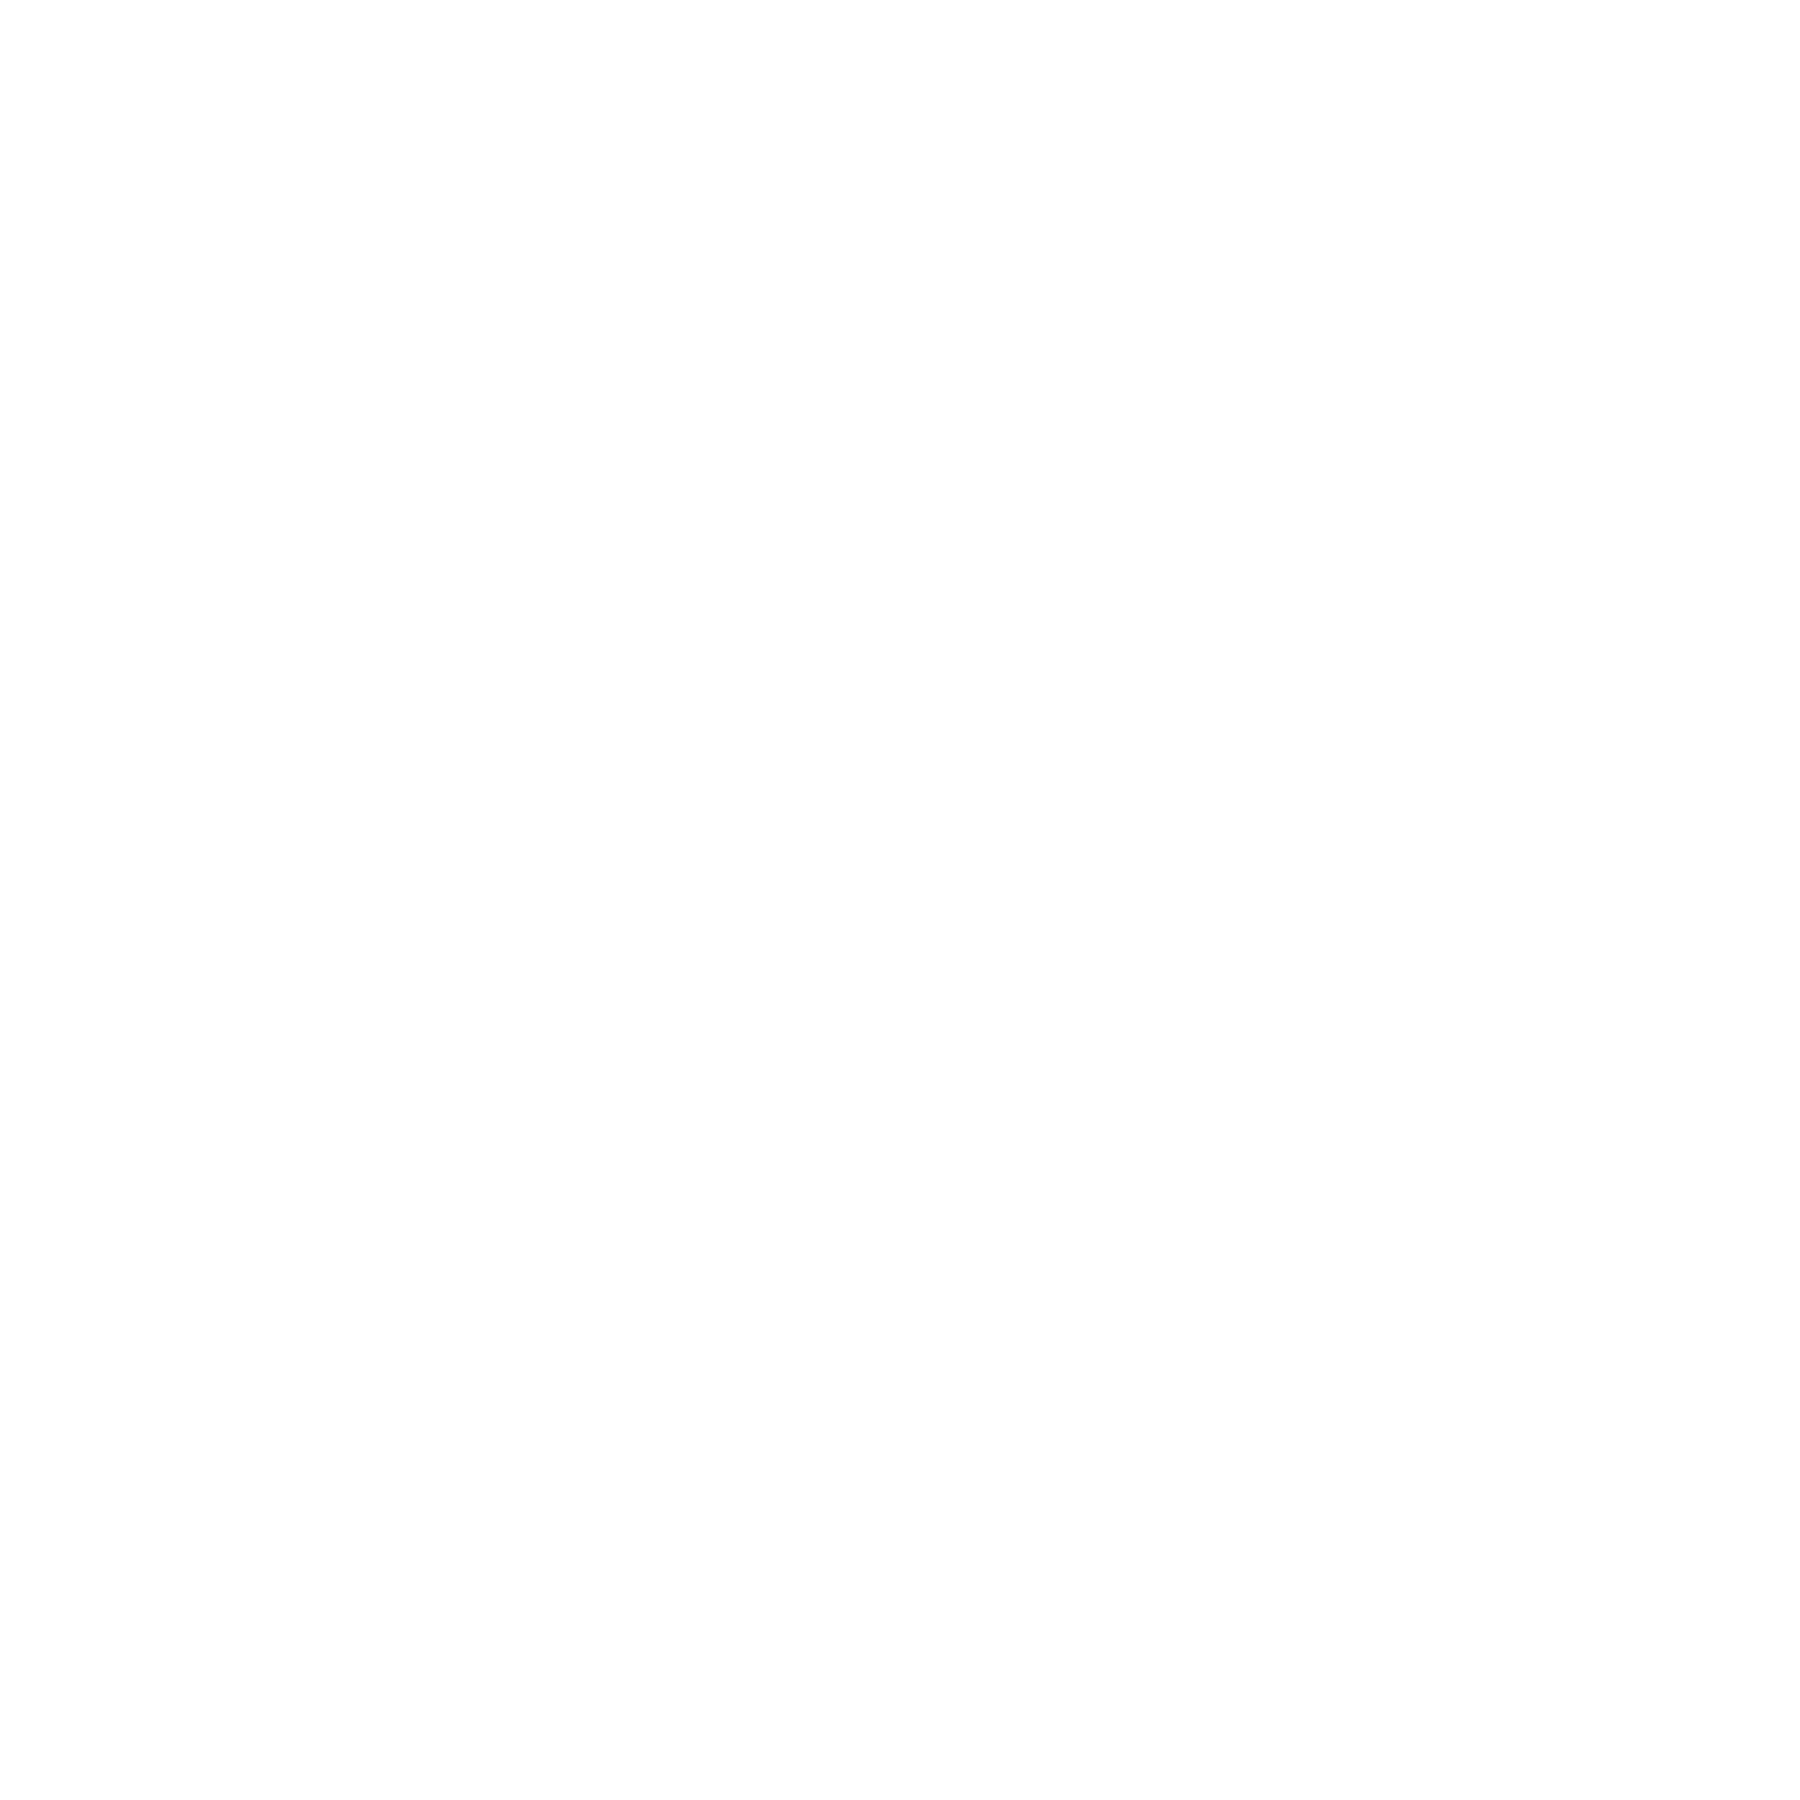

In [30]:
# c("crmrte", "prbarr", "prbconv", "prbpris", "density", "taxpc", "wcon", "wtrd", 
#                    "wfir", "wmfg", "wfed", "wloc", "pctymle", "taxPct", "wage", "mix", "wser", 
#                    "polpc", "avgsen", "pctmin80", "wsta", "wtuc")
smoothing_method = "glm"
options(repr.plot.width=15, repr.plot.height=15)
ggscatmat(cdata[,c('crmrte','prbarr','prbconv','prbpris','avgsen','polpc','density','taxpc','urban','pctmin80','wcon','wtuc','wtrd','wfir','wser','wmfg','wfed','wsta','wloc','mix','pctymle','wage','taxPct')], alpha=0.8) +
geom_smooth(method=smoothing_method)

#### Variable Selection

The variable selection process is based on two consequtive criterias - degree of practical and statistical significance. 
After taking notes from the local law enforcement, IRS and other legislative authorities, we can narrow the list to fewer key variables, such as "prbarr", "prbconv", "density", "taxpc", "wage", "pctymle", "polpc", "pctmin80", "mix".

The chosen variables are in fact part of three different domains:
Certainty of punishment - "prbarr" and "prbconv"
Demographic variations - "density", "pctymle", "pctmin80"
Financial standing - "taxpc", "wage"

Few variables may not play a useful role in the analysis for the following reasons
- The 'county' and 'year' variables can be ignored as those do not vary with the crime rate. 
- The average sentence days ('avgsen') are determined by a long process of court trials and federally standardized protocols. Criminal activities may not be significantly motivated by the sentencing terms.
- County location alone may not be a good factor of crime rate data. Other variables like, "polpc" and "density" should be closly related with urbun and rural locations. So, any information about "density" or "polpc" will be diluted as "density" has statistical significance.
- As previously discussed, all the wage variables are consolidated into one variable, "wage", since individual use of those in a model may not contribute much.

Statistical significance of these variables are analyzed as part of the model creation ane EDA. Initially, independent variables will be chosen for the OLS regression, if they are significantly correlated with the dependent variable, crime rate.

#### Distribution

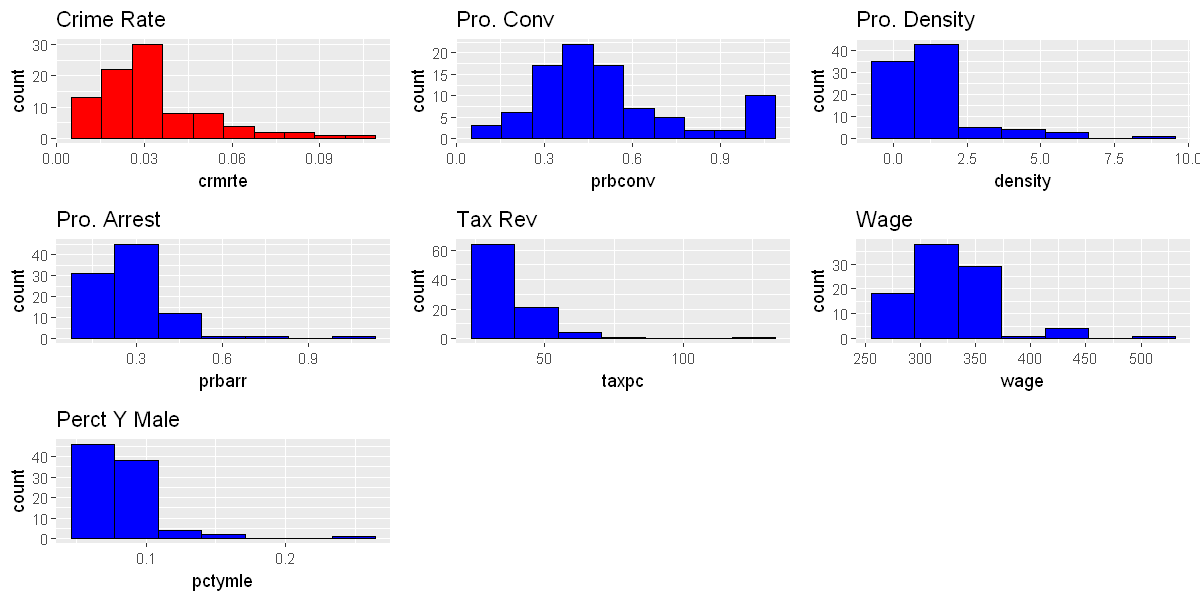

In [25]:
c <- ggplot(data=cdata, aes(crmrte)) +
    geom_histogram(bins=10, fill="red", color="black") + 
    ggtitle(paste("Crime Rate"))

cn <- ggplot(data=cdata, aes(prbconv)) +
    geom_histogram(bins=10, fill="blue", color="black") + 
    ggtitle(paste("Pro. Conv"))

dn <- ggplot(data=cdata, aes(density)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Pro. Density"))

ar <- ggplot(data=cdata, aes(prbarr)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Pro. Arrest"))

tp <- ggplot(data=cdata, aes(taxpc)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Tax Rev"))

wc <- ggplot(data=cdata, aes(wage)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Wage"))

pct <- ggplot(data=cdata, aes(pctymle)) +
    geom_histogram(bins=7, fill="blue", color="black") + 
    ggtitle(paste("Perct Y Male"))

ggarrange(c, cn, dn, ar,tp, wc,pct,
          ncol = 3, nrow = 3)

Although few of the distributions are skewed, taking log values did not improve any further. So, no transformation necessary.

From the Appendix - A, it is clear that applying different forms of data transformations (natural log, square, square root) did not make correlational improvements with the crime rate variable.

### Model Creation

#### Model 1 - Simple Linear Regression


Call:
lm(formula = crmrte ~ prbarr + prbconv + density + taxpc + wage + 
    pctymle, data = cdata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.023802 -0.006283 -0.001550  0.005532  0.036629 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.537e-02  1.346e-02   1.141  0.25692    
prbarr      -2.878e-02  9.461e-03  -3.042  0.00313 ** 
prbconv     -1.791e-02  5.417e-03  -3.306  0.00139 ** 
density      6.265e-03  1.011e-03   6.199 2.03e-08 ***
taxpc        3.251e-04  9.365e-05   3.472  0.00082 ***
wage         7.989e-06  3.556e-05   0.225  0.82277    
pctymle      1.388e-01  5.118e-02   2.712  0.00810 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01065 on 84 degrees of freedom
Multiple R-squared:  0.7007,	Adjusted R-squared:  0.6793 
F-statistic: 32.77 on 6 and 84 DF,  p-value: < 2.2e-16


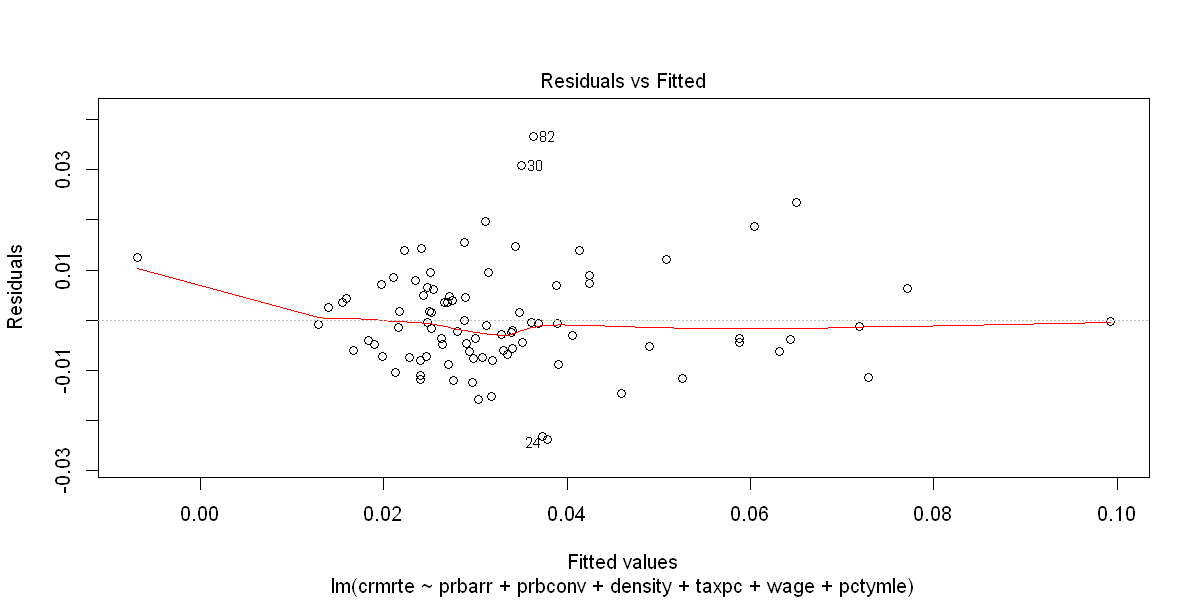

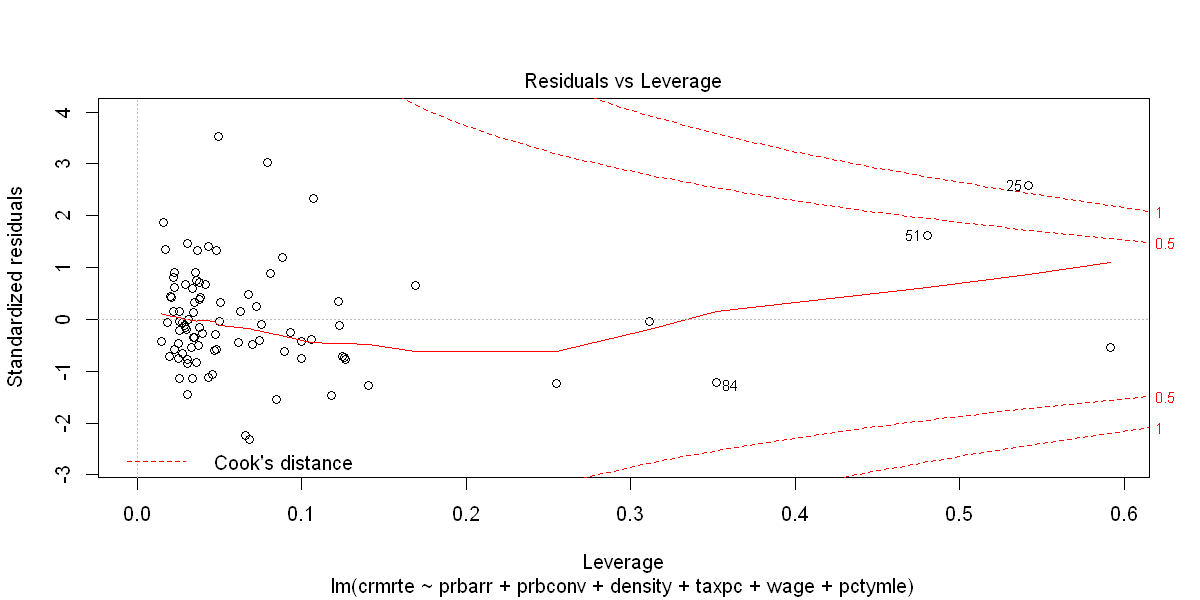

In [31]:
options(repr.plot.width=10, repr.plot.height=5)
model1 <- lm(crmrte ~  prbarr + prbconv + density + taxpc + wage + pctymle, data = cdata)
summary(model1)
plot(model1, which = 1)
plot(model1, which = 5)

In [39]:
paste("AIC Score: ", AIC(model1))
paste("Covariation of coefficients - ")
diag(vcov(model1))
paste("Mean residuals: ", mean(model1$residuals))

[1] "AIC Score:  -559.671140806715"

[1] "Covariation of coefficients - "

(Intercept)       prbarr      prbconv      density        taxpc         wage 
1.812985e-04 8.951943e-05 2.934069e-05 1.021305e-06 8.770202e-09 1.264199e-09 
     pctymle 
2.619771e-03

[1] "Mean residuals:  2.85166207566554e-19"

#### Model 1 - Interpretation 

Statistical Figures

1. Low Residuals 
    Median: -0.002907
    Mean: 2.85166207566554e-19
2. Low Coefficients and low variation of coeffcients
3. Low RSE: 0.01065 
4. Significantly high R-squared/Adjusted R-squared values -  0.7007, 0.6793
5. Low AIC score: -559.671140806715
7. Couple of values more than 1 cook's distance

Quality and Measurement of OLS Assumptions

- From the Fitted and Residual Plot, the spline curve shows a good alignment with the fitted line. It proves linear relation between dependent and independent variables. In addition, the plot does show biasness as the data points are not random.
- The model efficiency is high since the coeffcient variations or robust standard error values are low. It also means the estimators are consistent around the regression line.
- Except 'wage', all other variables are statistically significant with at least two stars.
- High Adjusted R-squared value implies goodness of fit.
- Two observations can be considered as outliers and those may influnce the estimation.

#### Model 2 - Multiple Independent Variables

Adjustments after Model1 results - 
1. Removing two outliers 
2. Removing statistically insignificant variable, wage. 
3. Introducing new variables which have practical significance. <br>
Note - These variables have weak correlation with other independent variables. So, it will violate the Multicollinearity.

##### Removing outliers

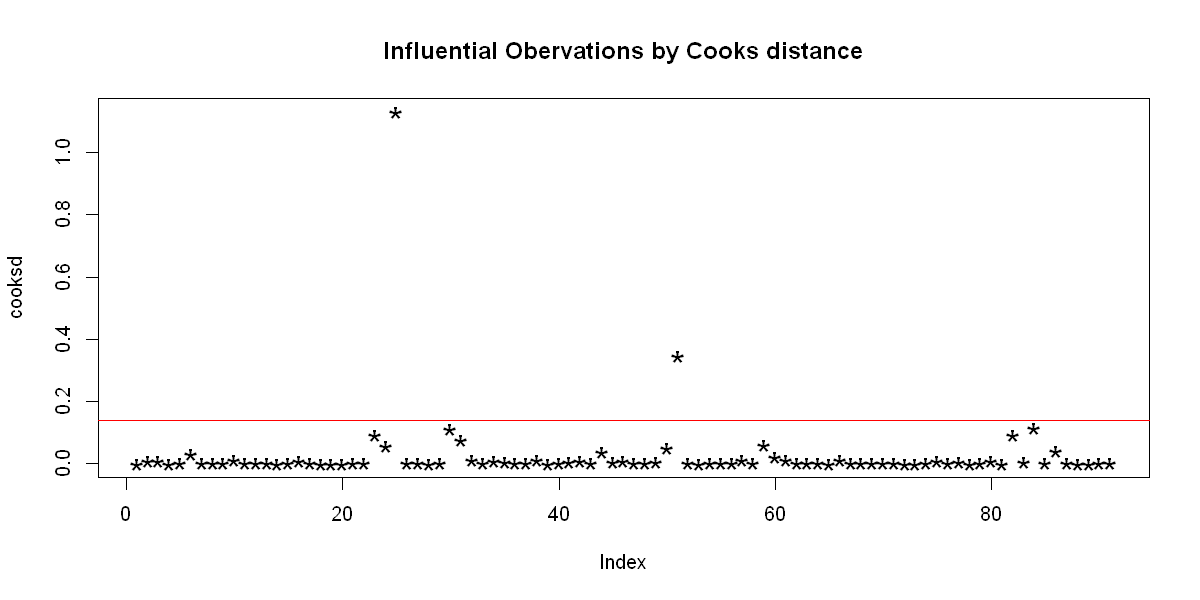

In [40]:
#Cooks distance measurement
cooksd <- cooks.distance(model1)
plot(cooksd, pch="*", cex=2, main="Influential Obervations by Cooks distance")
abline(h = 5*mean(cooksd, na.rm=T), col="red")

In [41]:
#Influential Outliers
influential <- as.numeric(names(cooksd)[(cooksd > 5*mean(cooksd, na.rm=T))])
cooksd[influential]

25        51 
1.1297046 0.3454757

In [42]:
#Remove outliers
ctdata <- cdata[(cdata$county != cdata[influential[1],]$county) & (cdata$county != cdata[influential[2],]$county),]


Call:
lm(formula = crmrte ~ prbarr + prbconv + density + taxpc + pctymle + 
    polpc + pctmin80 + mix, data = ctdata)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0199194 -0.0042765 -0.0002695  0.0047290  0.0225797 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.963e-02  7.880e-03   3.761 0.000321 ***
prbarr      -4.561e-02  1.095e-02  -4.166 7.77e-05 ***
prbconv     -2.358e-02  4.683e-03  -5.036 2.88e-06 ***
density      6.877e-03  7.772e-04   8.848 1.75e-13 ***
taxpc       -4.865e-05  1.097e-04  -0.443 0.658684    
pctymle      8.721e-02  4.120e-02   2.117 0.037402 *  
polpc        3.460e+00  1.911e+00   1.810 0.073995 .  
pctmin80     3.624e-04  5.411e-05   6.698 2.68e-09 ***
mix         -1.420e-02  1.370e-02  -1.036 0.303230    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.008235 on 80 degrees of freedom
Multiple R-squared:  0.8128,	Adjusted R-squared:  0.7941 
F-stat

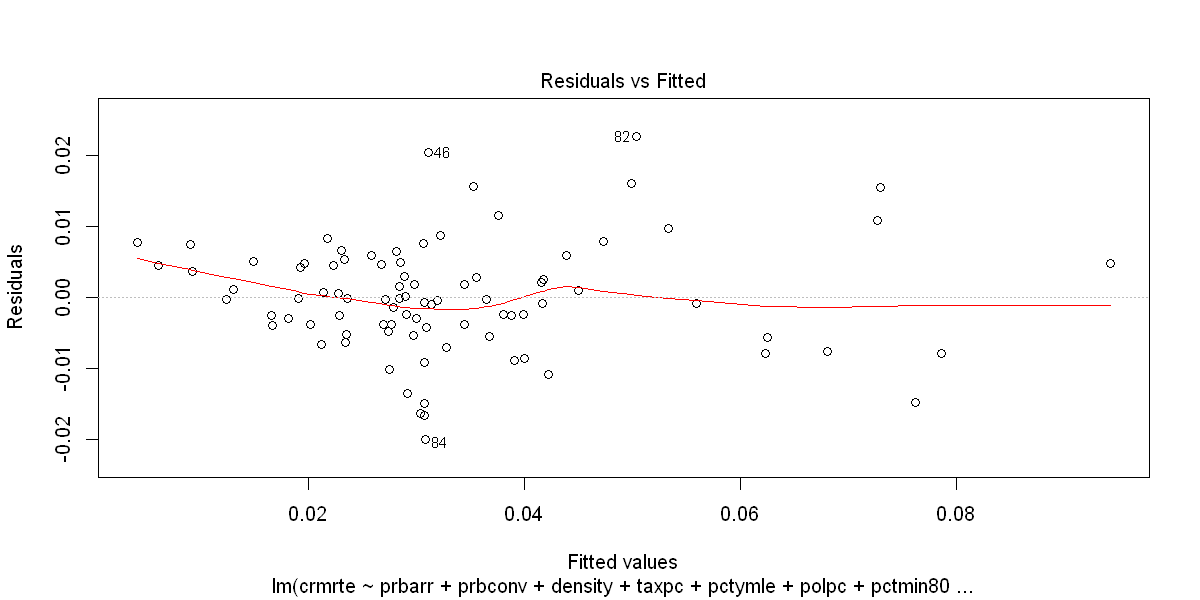

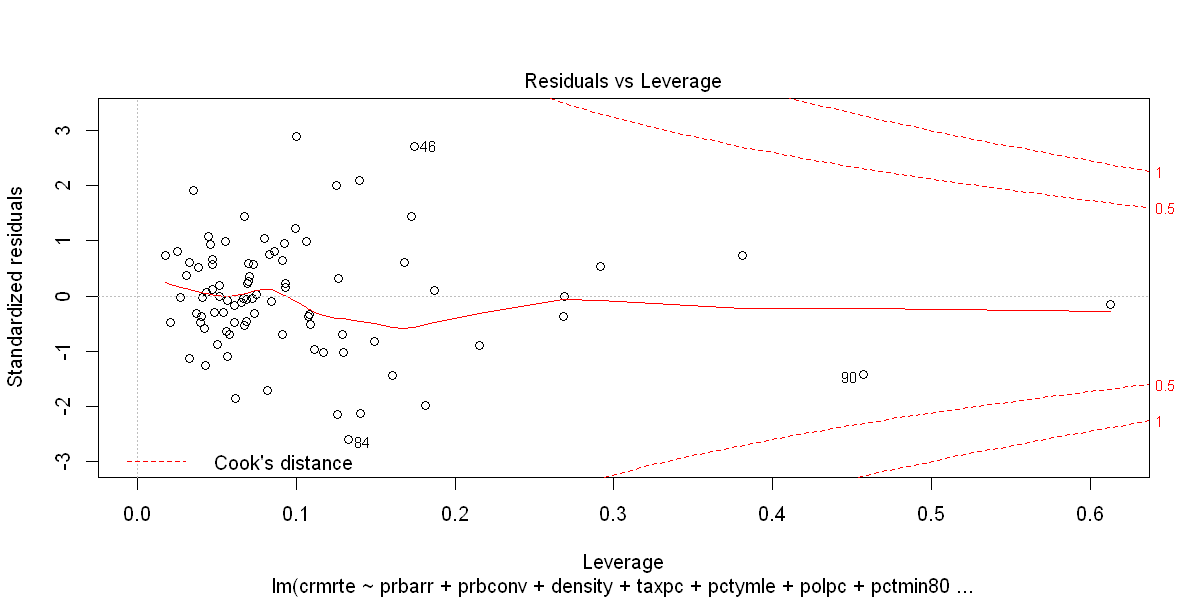

In [43]:
#Create model2
model2 <- lm(crmrte ~ prbarr + prbconv + density + taxpc + pctymle + polpc + pctmin80 + mix, data = ctdata)
summary(model2)
plot(model2, which = 1)
plot(model2, which = 5)

In [44]:
paste("AIC Score: ", AIC(model2))
paste("Covariation of coefficients - ")
diag(vcov(model2))
paste("Mean residuals: ", mean(model2$residuals))

[1] "AIC Score:  -591.204239814494"

[1] "Covariation of coefficients - "

(Intercept)       prbarr      prbconv      density        taxpc      pctymle 
6.209053e-05 1.198339e-04 2.192765e-05 6.040568e-07 1.203958e-08 1.697812e-03 
       polpc     pctmin80          mix 
3.653788e+00 2.927751e-09 1.877186e-04

[1] "Mean residuals:  -1.68519108301068e-19"

#### Model 2 - Interpretation 

1. Low Residuals - -0.001550 (Median) 
2. Low Coefficients for all the variables
3. Low RSE - 0.01065 (**Lower than Model 1**) 
4. Significantly high R-squared/Adjusted R-squared values -  0.7007, 0.6793 (**Significantly higher than Model 1**)
5. Low AIC score - -559.671140806715 (**Lower than Model 1**) 
6. Low model variation 
7. 1 data point is more than 1 Cook's distance

Outcome - Model 2 is more robust than Model 1

#### Model 3 - Optimization

**Omitting Variables Bias**

The dependent variables influence each other and those positive or negative bias is captured by the error term. Now, assumption of the regressor states that the error term should not have significant correlation with the dependent variable.

**If the following condition satifies, it is safe to omit variable**

The condition E(ui|Xi)=0E(ui|Xi)=0 <br>
X is **Not** correlated with the omitted variable. <br> 
The omitted variable is **Not** a determinant of the dependent variable Y. 

### ================== <br>
#### TODO - Tej, please explain why these combination of variables are creating robust model. If possible, include your steps in the Appindex - B
### ================== <br>

In accordance with the above condition, the following variables are generating best fit model.


Call:
lm(formula = crmrte ~ density + pctymle + prbconv + prbarr + 
    polpc + pctmin80, data = cdata)

Coefficients:
(Intercept)      density      pctymle      prbconv       prbarr        polpc  
  0.0320026    0.0058418    0.0660636   -0.0268677   -0.0597460    5.9994153  
   pctmin80  
  0.0003344  



Call:
lm(formula = crmrte ~ density + pctymle + prbconv + prbarr + 
    polpc + pctmin80, data = cdata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019706 -0.005265 -0.000271  0.005127  0.031773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.200e-02  6.315e-03   5.068 2.36e-06 ***
density      5.842e-03  7.533e-04   7.755 1.87e-11 ***
pctymle      6.606e-02  4.331e-02   1.525    0.131    
prbconv     -2.687e-02  4.503e-03  -5.966 5.57e-08 ***
prbarr      -5.975e-02  9.417e-03  -6.345 1.08e-08 ***
polpc        5.999e+00  1.175e+00   5.105 2.03e-06 ***
pctmin80     3.344e-04  5.739e-05   5.826 1.01e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009037 on 84 degrees of freedom
Multiple R-squared:  0.7846,	Adjusted R-squared:  0.7692 
F-statistic:    51 on 6 and 84 DF,  p-value: < 2.2e-16


[1] -589.6145

(Intercept)      density      pctymle      prbconv       prbarr        polpc 
3.987465e-05 5.674629e-07 1.875540e-03 2.027948e-05 8.867329e-05 1.381095e+00 
    pctmin80 
3.293367e-09

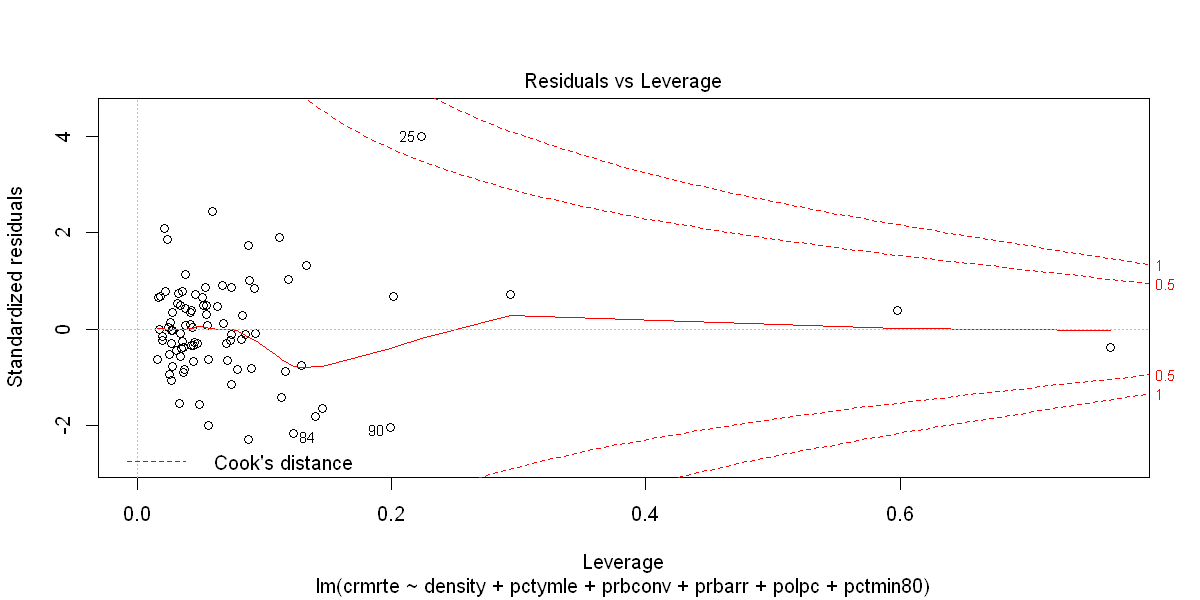

In [15]:
(model3 <- lm(crmrte ~ density + pctymle + prbconv + prbarr + polpc + pctmin80, data = cdata))
summary(model3)
AIC(model3)
diag(vcov(model3))
options(repr.plot.width=10, repr.plot.height=5)
plot(model3, which = 5)

#### Model 3 - Interpretation 

1. Very Low Residuals - -0.000271 (Median) 
2. Compare to Model1/Model2 Higher Coefficients for all the variables 
3. Very Low RSE - 0.009037 (**Lower than Model 1 and Model 2**) 
4. Significantly high R-squared/Adjusted R-squared values -  0.7846, 0.7692  (**Significantly higher than Model 1 and Model 2**)
5. Low AIC score - -589.614545797105 (**Lower than Model 1 and Model 2**) 
6. Very Low model variation 
7. No data point is more than 1 Cook's distance

Outcome - Model 3 is better than Model 1 and Model 2

In [16]:
# Comparing multiple models
stargazer(model1, model2, model3, type = "text", 
          report = "vc", # Don't report errors, since we haven't covered them
          title = "Linear Models of Crime Rates",
          keep.stat = c("rsq", "adj.rsq", "aic", "n"),
          omit.table.layout = "n") # Omit more output related to errors


Linear Models of Crime Rates
              Dependent variable: 
             ---------------------
                    crmrte        
              (1)     (2)    (3)  
----------------------------------
density      0.009   0.006  0.006 
                                  
pctymle              0.139  0.066 
                                  
prbconv             -0.018  -0.027
                                  
prbarr              -0.029  -0.060
                                  
taxpc               0.0003        
                                  
wage                0.00001       
                                  
polpc                       5.999 
                                  
pctmin80                    0.0003
                                  
Constant     0.020   0.015  0.032 
                                  
----------------------------------
Observations   91     91      91  
R2           0.531   0.701  0.785 
Adjusted R2  0.526   0.679  0.769 


### Appendix - A
Compare Corr for Different Transformation with Crime Rate

In [28]:
getLogTran <- function(df, cols, tranType, tranTypeDep){
    corList <- list()
    
    for(coln in cols){
               
        if(tranType == ''){
          corList <- append(corList, cor(df[[coln]], tranVar(df$crmrte, tranTypeDep)))   
            
        }else{
            
          newColN <- paste(coln, tranType, sep="_")
          df[[newColN]] <- tranVar(df[[coln]], tranType)    
          corList <- append(corList, cor(df[[newColN]], tranVar(df$crmrte, tranTypeDep)))              
      }        
        
    }
    
    return (corList)
}
    
tranVar <- function(var1, tranType){
    if(tranType == 'lg'){
        return (log(var1))
    } else if(tranType == 'sq'){
        return (var1^2)
    } else if(tranType == 'sqt'){
        return (sqrt(var1))
    } else {
        return (var1)
    }
}

In [29]:


#tdata <- data.frame(matrix(ncol = 12, nrow = 0))
cols <- c("crmrte", "prbarr", "prbconv", "density", "taxpc", "wage", "pctymle")
#colnames(tdata) <- cols

#for(ops in c('', 'lg', 'sq', 'sqt')){
print('------------------Corr with Crime Rate. No trans of crmrte---------------------')
   
list_data <- list(cols, getLogTran(cdata, cols, 'lg', ''), 
                  getLogTran(cdata, cols, 'sq', ''), getLogTran(cdata, cols, 'sqt', ''), getLogTran(cdata, cols, '', ''))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. Log trans of crmrte---------------------')

list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'lg'), 
                  getLogTran(cdata, cols, 'sq', 'lg'), 
                  getLogTran(cdata, cols, 'sqt', 'lg'), 
                  getLogTran(cdata, cols, '', 'lg'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. Square Trans of crmrte---------------------')


list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'sq'), 
                  getLogTran(cdata, cols, 'sq', 'sq'), 
                  getLogTran(cdata, cols, 'sqt', 'sq'), 
                  getLogTran(cdata, cols, '', 'sq'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata

print('------------------Corr with Crime Rate. SQRT Trans of crmrte---------------------')


list_data <- list(cols, getLogTran(cdata, cols, 'lg', 'sqt'), 
                  getLogTran(cdata, cols, 'sq', 'sqt'), 
                  getLogTran(cdata, cols, 'sqt', 'sqt'), 
                  getLogTran(cdata, cols, '', 'sqt'))

tdata  <-  as.data.frame(matrix(unlist(list_data), nrow=length(unlist(list_data[1]))))
colnames(tdata) <- c("var", "lg", "sq", "sqt", "none")
tdata


[1] "------------------Corr with Crime Rate. No trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,NA,NA,NA,NA
prbarr,NA,NA,NA,NA
prbconv,NA,NA,NA,NA
density,NA,NA,NA,NA
taxpc,NA,NA,NA,NA
wage,NA,NA,NA,NA
pctymle,NA,NA,NA,NA


[1] "------------------Corr with Crime Rate. Log trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,NA,NA,NA,NA
prbarr,NA,NA,NA,NA
prbconv,NA,NA,NA,NA
density,NA,NA,NA,NA
taxpc,NA,NA,NA,NA
wage,NA,NA,NA,NA
pctymle,NA,NA,NA,NA


[1] "------------------Corr with Crime Rate. Square Trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,NA,NA,NA,NA
prbarr,NA,NA,NA,NA
prbconv,NA,NA,NA,NA
density,NA,NA,NA,NA
taxpc,NA,NA,NA,NA
wage,NA,NA,NA,NA
pctymle,NA,NA,NA,NA


[1] "------------------Corr with Crime Rate. SQRT Trans of crmrte---------------------"


var,lg,sq,sqt,none
crmrte,NA,NA,NA,NA
prbarr,NA,NA,NA,NA
prbconv,NA,NA,NA,NA
density,NA,NA,NA,NA
taxpc,NA,NA,NA,NA
wage,NA,NA,NA,NA
pctymle,NA,NA,NA,NA
